In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
iris = load_iris(as_frame=True)
X = iris.data
y_true = iris.target


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

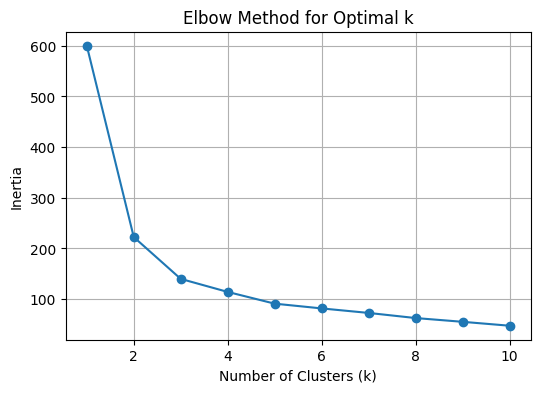

In [4]:
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(6, 4))
plt.plot(K, inertia, marker="o")
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()

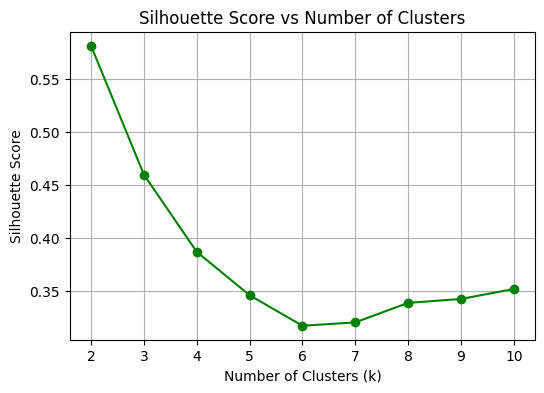

In [5]:
silhouette_scores = []
K = range(2, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    silhouette_scores.append(silhouette_score(X_scaled, labels))

plt.figure(figsize=(6, 4))
plt.plot(K, silhouette_scores, marker="o", color="green")
plt.title("Silhouette Score vs Number of Clusters")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()

In [6]:
best_k = 3
kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)
y_kmeans = kmeans.fit_predict(X_scaled)

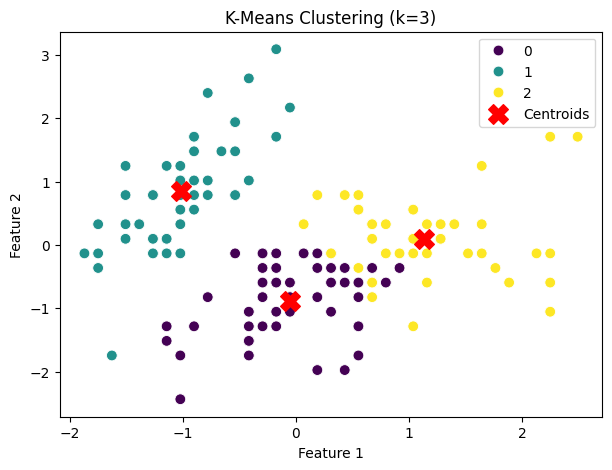

In [7]:
plt.figure(figsize=(7, 5))
sns.scatterplot(
    x=X_scaled[:, 0], y=X_scaled[:, 1],
    hue=y_kmeans, palette="viridis", s=60
)
plt.scatter(kmeans.cluster_centers_[:, 0],
            kmeans.cluster_centers_[:, 1],
            s=200, c='red', marker='X', label='Centroids')
plt.title(f"K-Means Clustering (k={best_k})")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

In [8]:
sil_score = silhouette_score(X_scaled, y_kmeans)
print(f"Silhouette Score: {sil_score:.3f}")

# Optional: Compare with true labels (just to see accuracy-like metric)
from sklearn.metrics import adjusted_rand_score
ari = adjusted_rand_score(y_true, y_kmeans)
print(f"Adjusted Rand Index (vs true labels): {ari:.3f}")

Silhouette Score: 0.460
Adjusted Rand Index (vs true labels): 0.620
